In [66]:
import torch
import torchvision
import matplotlib.pyplot  as plt
from torch.utils import data
from torch import nn

# 1.Set Up GPU

In [86]:
# 检查是否有可用的GPU
if torch.cuda.is_available():
    # 如果有GPU，打印GPU的数量
    print(f"Found {torch.cuda.device_count()} GPU(s)")
    # 打印当前使用的GPU名称
    print(f"Current GPU: {torch.cuda.get_device_name(torch.cuda.current_device())}")
    # 设置设备为第一个GPU
    device = torch.device("cuda:0")
else:
    # 如果没有GPU，打印提示信息并使用CPU
    print("No GPU available, using CPU")
    # 设置设备为CPU
    device = torch.device("cpu")

Found 1 GPU(s)
Current GPU: NVIDIA GeForce RTX 4060 Laptop GPU


# 2.Data Processing

In [ ]:
# 创建一个Compose对象，用于组合多个图像转换操作
transform = torchvision.transforms.Compose([
    # 将NumPy转换为FloatTensor，并缩放像素值范围到[0, 1]
    torchvision.transforms.ToTensor(),
    # 对图像数据进行标准化处理，设置均值为0.5，标准差为0.5
    # 这有助于神经网络更快地收敛
    torchvision.transforms.Normalize(mean=[0.5], std=[0.5])
])

## 2.1.Download the dataset

In [ ]:
# 导入MNIST数据集
# torchvision.datasets.MNIST是一个用于加载MNIST数据集的类
# "./data"指定了数据集的存储路径
# train=True表示加载训练集，train=False表示加载测试集
# transform参数用于对数据进行预处理，例如归一化等
# download=True表示如果数据集不存在，则自动下载
train_dataset = torchvision.datasets.MNIST("./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST("./data", train=False, transform=transform)

## 2.2.View Picture Information

image 0 shape:  (28, 28)
image 1 shape:  (28, 28)
image 2 shape:  (28, 28)
image 3 shape:  (28, 28)
image 4 shape:  (28, 28)
image 5 shape:  (28, 28)
image 6 shape:  (28, 28)
image 7 shape:  (28, 28)
image 8 shape:  (28, 28)
image 9 shape:  (28, 28)


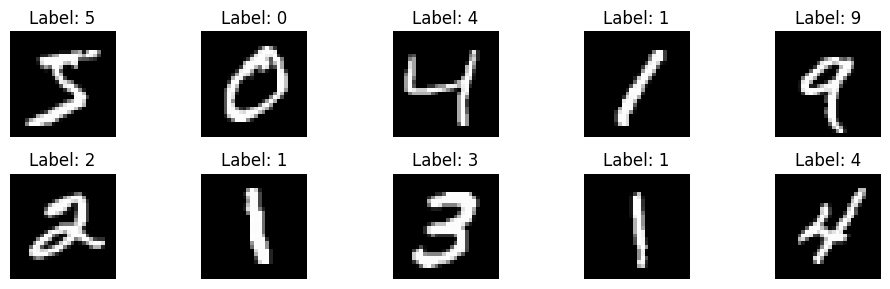

In [82]:
# 显示前10张图片
plt.figure(figsize=(10, 3))
for i in range(10):
    image, label = train_dataset[i]
    # 将张量转换为numpy数组并去除通道维度
    img = image.squeeze().numpy()
    
    plt.subplot(2, 5, i+1)  # 2行5列的子图
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')  # 关闭坐标轴
    print(f"image {i} shape: ", img.shape)

plt.tight_layout()
plt.show()

In [83]:
image, label = train_dataset[0]

print("Channel:", image.shape[0])
print("Height:", image.shape[1])
print("Width:", image.shape[2])

Channel: 1
Height: 28
Width: 28


In [72]:
batch_size = 256

train_loader = data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=batch_size)

# 3.Construct A Model

## 3.1.Build A CNN Network

In [101]:
class CNN(nn.Module):
    # 初始化方法
    def __init__(self):
        # 调用父类的初始化方法
        super(CNN, self).__init__()
        
        # 创建一个顺序模型
        self.model = nn.Sequential(
            # 第一层：卷积层，输入通道数为1，输出通道数为16，卷积核大小为3x3，步长为1，填充为1
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2),
            # 第二层：激活层，使用ReLU激活函数
            nn.ReLU(),
            # 第三层：池化层，使用最大池化，池化核大小为2x2，步长为2
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # 第四层：卷积层，输入通道数为16，输出通道数为32，卷积核大小为3x3，步长为1，填充为1
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2),
            # 第五层：激活层，使用ReLU激活函数
            nn.ReLU(),
            # 第六层：池化层，使用最大池化，池化核大小为2x2，步长为2
            nn.MaxPool2d(kernel_size=2, stride=2),
                        
            # 第九层：展平层，将多维输入展平成一维
            nn.Flatten(),
            # 第十层：全连接层，输入特征数为7*7*64，输出特征数为128
            nn.Linear(in_features= 7 * 7 * 64, out_features=128),
            # 第十一层：激活层，使用ReLU激活函数
            nn.ReLU(),
            # 第十二层：全连接层，输入特征数为128，输出特征数为64
            nn.Linear(in_features=128, out_features=64),
            # 第十三层：激活层，使用ReLU激活函数
            nn.ReLU(),
            # 第十四层：全连接层，输入特征数为64，输出特征数为10（对应10个类别）
            nn.Linear(in_features=64, out_features=10)
        )
        
    # 前向传播方法
    def forward(self, input):
        # 返回模型的输出
        return self.model(input)

In [102]:
model = CNN().to(device)
print(model)

CNN(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=3136, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=64, bias=True)
    (10): ReLU()
    (11): Linear(in_features=64, out_features=10, bias=True)
  )
)


## 3.2.Construct An Iterator And A Loss Function

In [103]:
# 定义损失函数，这里使用的是交叉熵损失，适用于多分类问题
criterion = nn.CrossEntropyLoss()

# 定义优化器，这里使用的是Adam优化器
# model.parameters() 获取模型中所有需要更新的参数
# lr=0.001 设置初始学习率为0.001
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 定义学习率调度器，这里使用的是步进式学习率调度器
# 这里 step_size=5 表示每5个epoch调整一次学习率，gamma=0.1 表示学习率乘以0.1
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# 4.Training Loop

In [ ]:
# 设置训练的总轮数（epochs）
epochs = 10

# 初始化用于存储训练和验证过程中损失和准确率的历史记录
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

# 遍历每一个训练轮次
for epoch in range(1, epochs + 1):
    """Train"""
    # 将模型设置为训练模式
    model.train()
    train_loss, train_correct = 0.0, 0  # 初始化训练损失和正确预测的数量
    
    # 遍历训练数据集
    for images, labels in train_loader:
        # 将数据移动到指定的设备
        images = images.to(device)
        labels = labels.to(device)
        
        # 清空梯度
        optimizer.zero_grad()
        # 前向传播，计算输出
        outputs = model(images)
        # 计算损失
        loss = criterion(outputs, labels)
        # 反向传播，更新权重
        loss.backward()
        optimizer.step()
        
        # 获取预测结果
        _, predictions = torch.max(outputs.data, dim=1)
        # 计算训练集上的正确预测数量
        train_correct += (predictions == labels).sum().item()
        # 累加训练损失
        train_loss += loss.item()
    
    # 更新学习率
    scheduler.step()
    # 计算平均训练损失和准确率
    avg_train_loss = train_loss / len(train_loader)
    avg_train_acc = train_correct / len(train_dataset)
    # 将结果添加到历史记录中
    history['train_loss'].append(avg_train_loss)
    history['train_acc'].append(avg_train_acc)
    
    """Test"""
    # 将模型设置为评估模式
    model.eval()
    val_loss, val_correct = 0.0, 0  # 初始化验证损失和正确预测的数量
    
    # 禁用梯度计算，减少内存消耗和计算量
    with torch.no_grad():
        # 遍历测试数据集
        for images, labels in test_loader:
            # 将数据移动到指定的设备
            images = images.to(device)
            labels = labels.to(device)
            # 前向传播，计算输出
            outputs = model(images)
            # 计算损失
            loss = criterion(outputs, labels)
            
            # 获取预测结果
            _, predictions = torch.max(outputs.data, dim=1)
            # 计算验证集上的正确预测数量
            val_correct += (predictions == labels).sum().item()
            # 累加验证损失
            val_loss += loss.item()

    # 计算平均验证损失和准确率
    avg_val_loss = val_loss / len(test_loader)
    avg_val_acc = val_correct / len(test_dataset)
    # 将结果添加到历史记录中
    history['val_loss'].append(avg_val_loss)
    history['val_acc'].append(avg_val_acc)
    
    # 打印每个epoch的总结信息
    print(f"\nEpoch {epoch} Summary:")
    print(f"Train Loss: {avg_train_loss:.4f} | Train Acc: {avg_train_acc:.2%}")
    print(f"Val Loss: {avg_val_loss:.4f} | Val Acc: {avg_val_acc:.2%}\n")


Epoch 1 Summary:
Train Loss: 0.3202 | Train Acc: 90.53%
Val Loss: 0.0703 | Val Acc: 97.72%


Epoch 2 Summary:
Train Loss: 0.0687 | Train Acc: 97.81%
Val Loss: 0.0523 | Val Acc: 98.36%


Epoch 3 Summary:
Train Loss: 0.0459 | Train Acc: 98.63%
Val Loss: 0.0359 | Val Acc: 98.86%


Epoch 4 Summary:
Train Loss: 0.0352 | Train Acc: 98.96%
Val Loss: 0.0310 | Val Acc: 98.98%


Epoch 5 Summary:
Train Loss: 0.0279 | Train Acc: 99.13%
Val Loss: 0.0309 | Val Acc: 98.91%


Epoch 6 Summary:
Train Loss: 0.0150 | Train Acc: 99.55%
Val Loss: 0.0208 | Val Acc: 99.33%


Epoch 7 Summary:
Train Loss: 0.0125 | Train Acc: 99.66%
Val Loss: 0.0204 | Val Acc: 99.28%


Epoch 8 Summary:
Train Loss: 0.0115 | Train Acc: 99.68%
Val Loss: 0.0193 | Val Acc: 99.32%


Epoch 9 Summary:
Train Loss: 0.0105 | Train Acc: 99.72%
Val Loss: 0.0193 | Val Acc: 99.31%


Epoch 10 Summary:
Train Loss: 0.0098 | Train Acc: 99.75%
Val Loss: 0.0203 | Val Acc: 99.29%



# 5.Result Visualization

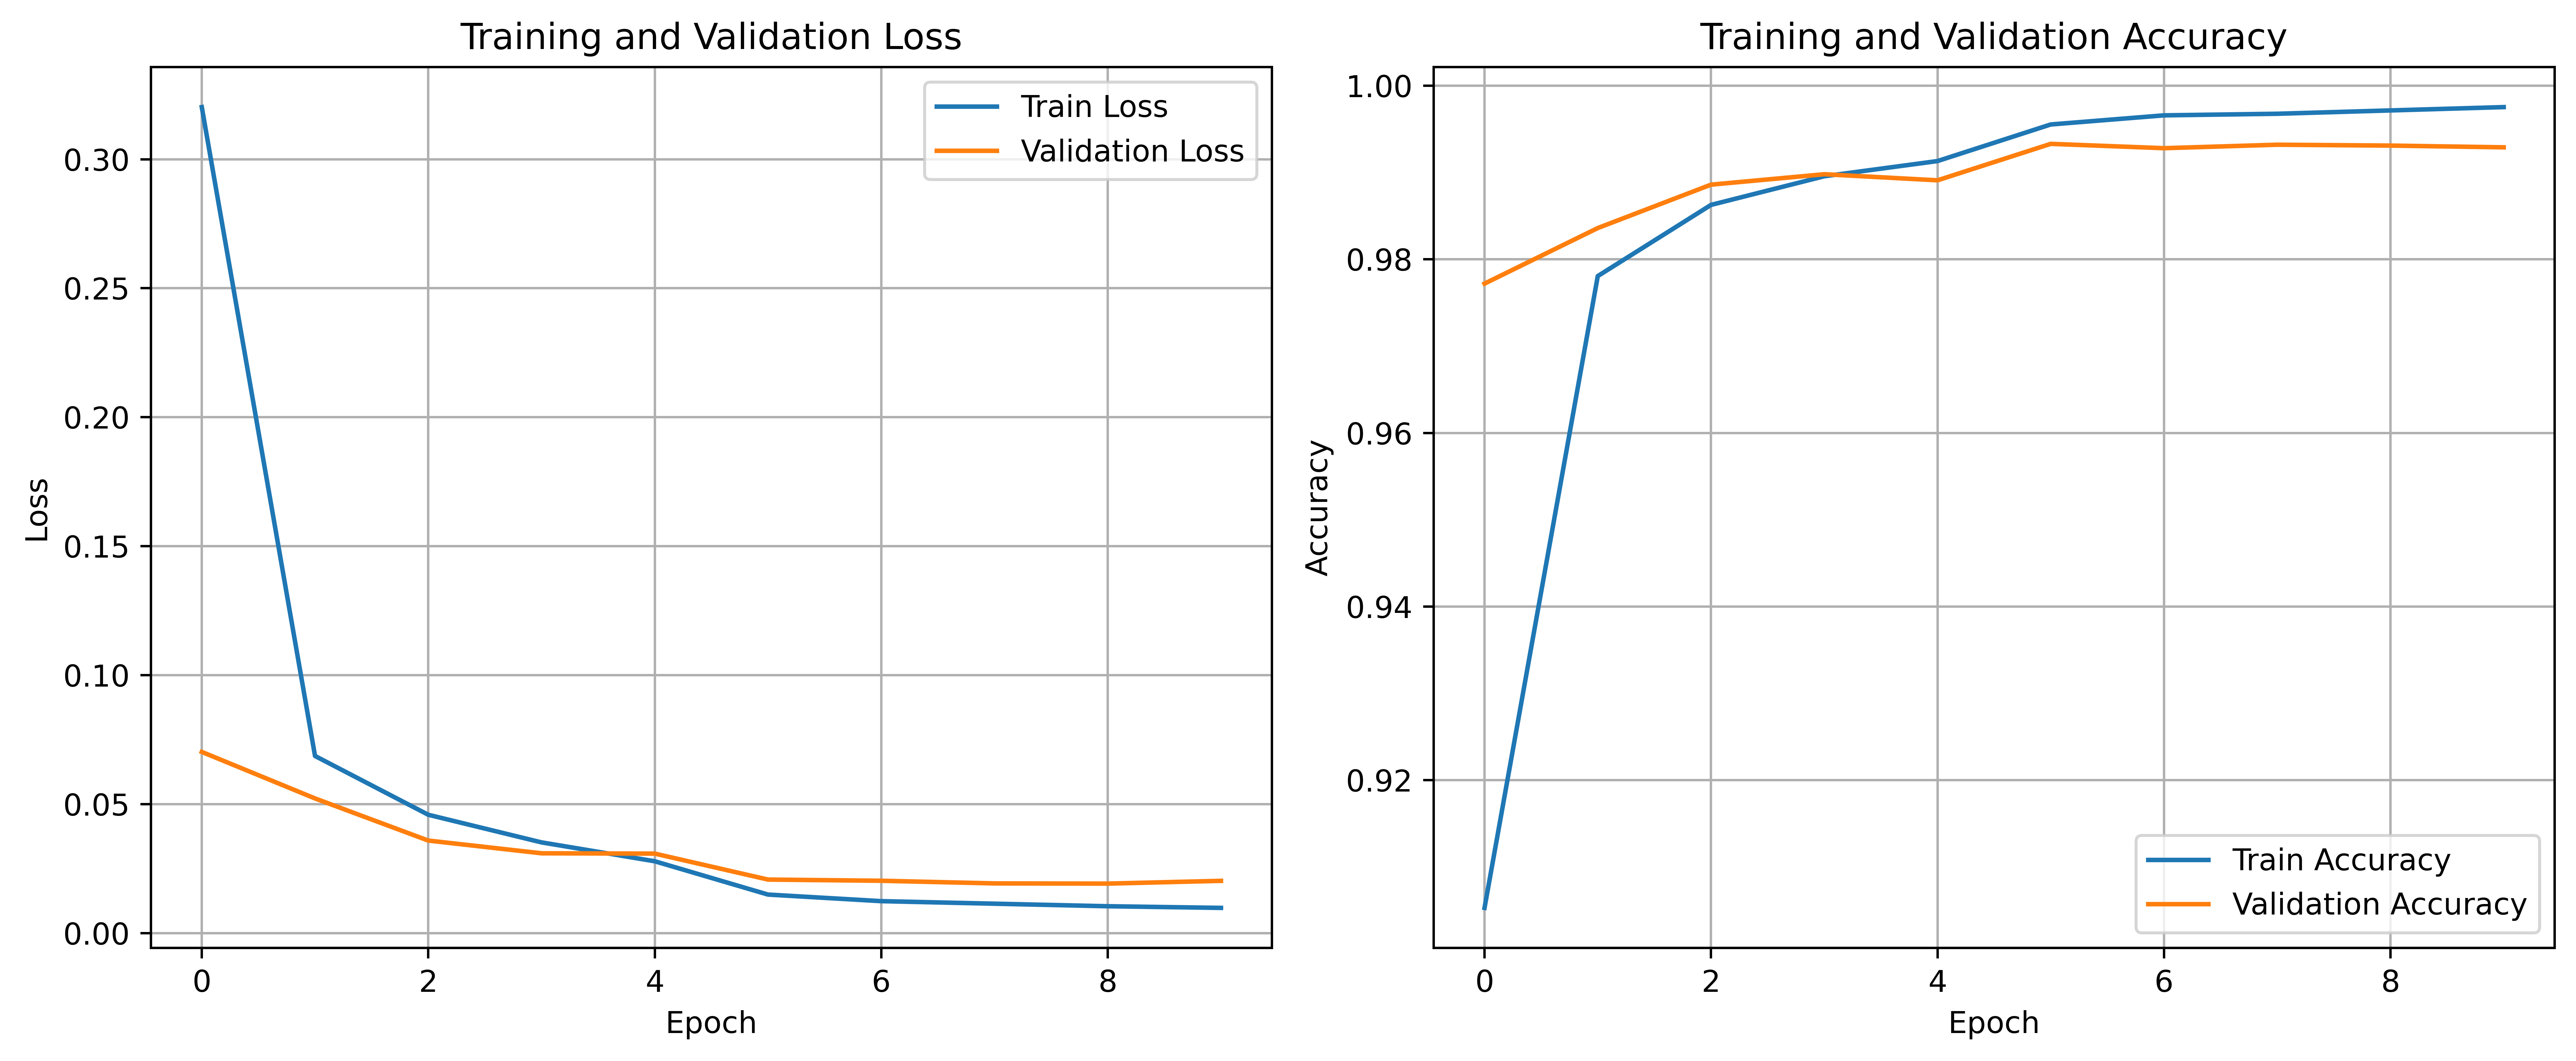

In [105]:
plt.figure(figsize=(12, 5), dpi=720)

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 6.Save The Model

In [106]:
# torch.save(model.state_dict(), 'mnist_cnn.pth')
# print("Model saved to mnist_cnn.pth")

# 7.Clear GPU Cache

In [107]:
if torch.cuda.is_available():
    torch.cuda.empty_cache()